In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
flights=pd.read_csv('ontime_per.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(flights.shape)
print(flights.head())

(445827, 110)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2016        1      1           6          3  2016-01-06            AA   
1  2016        1      1           7          4  2016-01-07            AA   
2  2016        1      1           8          5  2016-01-08            AA   
3  2016        1      1           9          6  2016-01-09            AA   
4  2016        1      1          10          7  2016-01-10            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N4YBAA      ...               NaN          NaN   
1      19805      AA  N434AA      ...               NaN          NaN   
2      19805      AA  N541AA      ...               NaN          NaN   
3      19805      AA  N489AA      ...               NaN          NaN   
4      19805      AA  N439AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN              

In [4]:
flights = flights[flights['Month'] == 1]
flights.shape


(445827, 110)

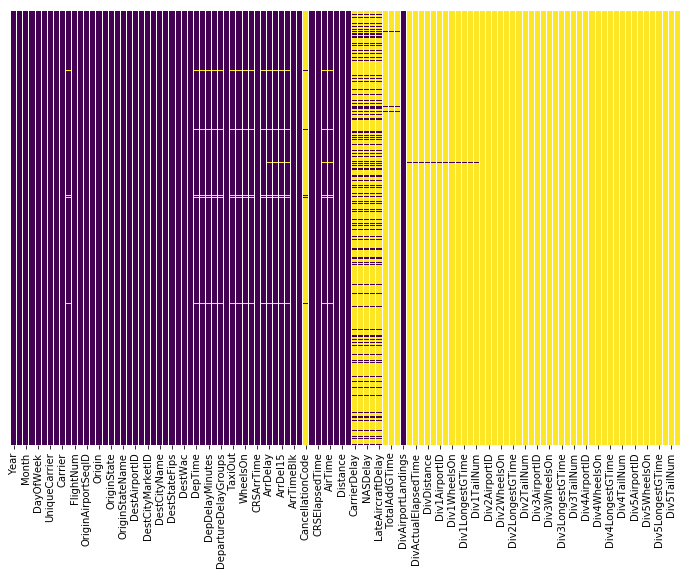

In [5]:
#yellow portion indicates missing values
plt.figure(figsize = (12, 8))
sns.heatmap(flights.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#i am dropping columns columns with 2/3rd of missing data
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [7]:
#columns like year which is constant is dropped
#i,e if no of unique elements is 1,drop those
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [8]:
#i took this code from kaggle which displays filling factor

missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrDelay,12529,97.189717
1,AirTime,12529,97.189717
2,ActualElapsedTime,12529,97.189717
3,ArrDelayMinutes,12529,97.189717
4,ArrDel15,12529,97.189717
5,ArrivalDelayGroups,12529,97.189717
6,TaxiIn,11907,97.329233
7,ArrTime,11907,97.329233
8,WheelsOn,11907,97.329233
9,TaxiOut,11600,97.398094


In [9]:
#because the missing values are <3% drop those rows
flights.dropna(inplace = True)
flights.shape

(433298, 52)

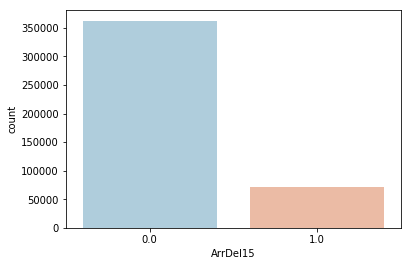

In [10]:
# i think graphs are clear and understandable
sns.countplot(x='ArrDel15',data=flights,palette='RdBu_r')


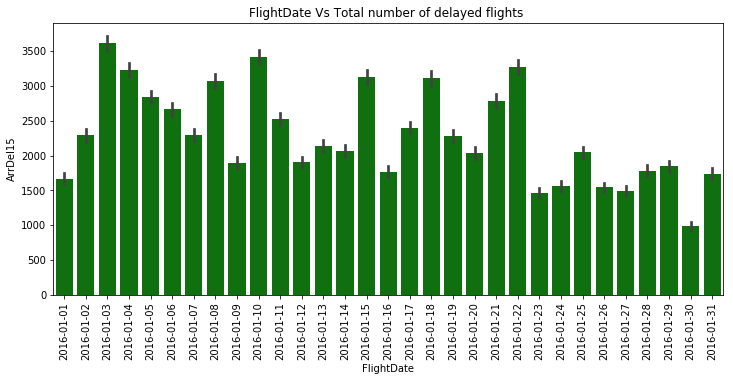

In [11]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=flights, color = "green" , order = order , estimator = np.sum)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

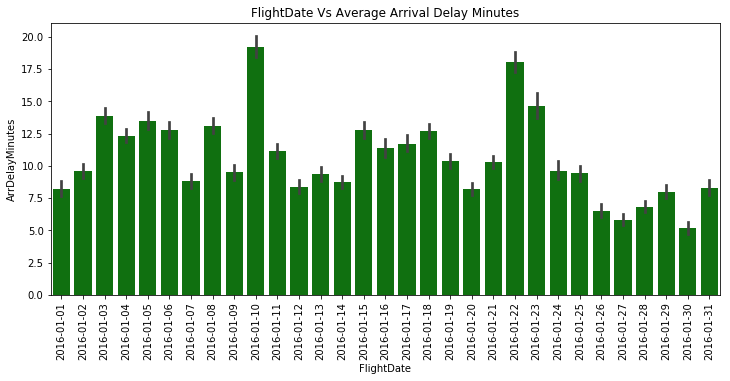

In [12]:
plt.figure(figsize=(12, 5))
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDelayMinutes', data=flights, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Average Arrival Delay Minutes")

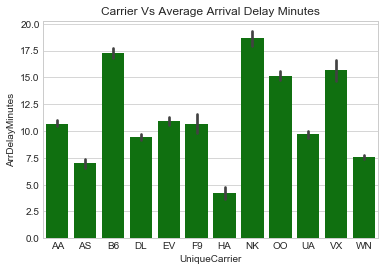

In [13]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(flights['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='ArrDelayMinutes', data=flights, color = "green" , order = carrier_order,estimator=np.mean)
fig = plt.title("Carrier Vs Average Arrival Delay Minutes")

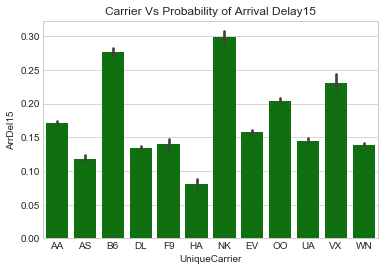

In [14]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Arrival Delay15")

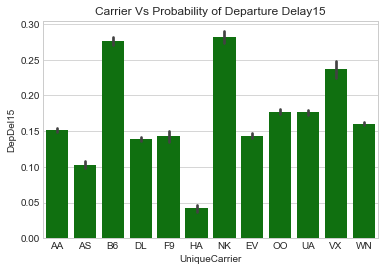

In [15]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="DepDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

In [16]:
#instead of have day number,i have converted it to categorical,for easy understanding
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
flights['Month'] = flights["DayofMonth"].apply(Impute_month)
flights.drop("DayofMonth", axis = 1, inplace = True)

In [17]:
#same logic as above
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
flights['Week'] = flights["DayOfWeek"].apply(Impute_week)
flights.drop("DayOfWeek", axis = 1, inplace = True)

In [18]:
flights.head()

,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,DivAirportLandings,Month,Week
0,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,155.0,132.0,986.0,4,0,weekI,Weekdays
1,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,150.0,126.0,986.0,4,0,weekI,Weekdays
2,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,170.0,135.0,986.0,4,0,weekII,Weekdays
3,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,151.0,129.0,986.0,4,0,weekII,Weekdays
4,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,171.0,137.0,986.0,4,0,weekII,Weekend


In [19]:

#exploring delays in different weeks of month
Month_grouped1 = flights.groupby('Month')["ArrDel15"].sum()
Month_grouped2 = flights.groupby('Month')["ArrDel15"].count()
print(Month_grouped1)
print(Month_grouped2)
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]
print(Month_grouped)

Month
weekI      18602.0
weekII     17028.0
weekIII    17515.0
weekIV     13160.0
weekV       4577.0
Name: ArrDel15, dtype: float64
Month
weekI      102704
weekII      99710
weekIII     98771
weekIV      91579
weekV       40534
Name: ArrDel15, dtype: int64
             sum   count  Average number of delays
Month                                             
weekI    18602.0  102704                  0.181122
weekII   17028.0   99710                  0.170775
weekIII  17515.0   98771                  0.177329
weekIV   13160.0   91579                  0.143701
weekV     4577.0   40534                  0.112918


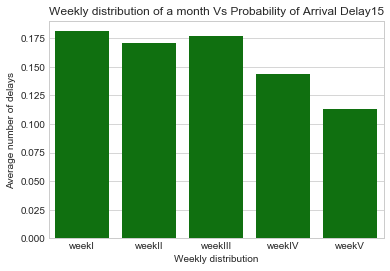

In [20]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

In [37]:
#explore delays in weekdays and weekends
week_grouped1 = flights.groupby('Week')["ArrDel15"].sum()
week_grouped2 = flights.groupby('Week')["ArrDel15"].count()
print(week_grouped1)
print(week_grouped2)
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of Arrival Delay15"] = week_grouped["sum"]/week_grouped["count"]
print(week_grouped)

Week
Weekdays    47231.0
Weekend     23651.0
Name: ArrDel15, dtype: float64
Week
Weekdays    306020
Weekend     127278
Name: ArrDel15, dtype: int64
              sum   count  Probability of Arrival Delay15
Week                                                     
Weekdays  47231.0  306020                        0.154340
Weekend   23651.0  127278                        0.185822


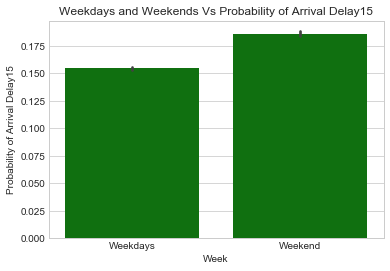

In [36]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Week, y ='ArrDel15', data=flights, color ='green')
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Weekdays and Weekends Vs Probability of Arrival Delay15")

In [23]:
#same logic as above but for orign airport
airport_grouped1 = flights.groupby('Origin')["ArrDel15"].sum()
airport_grouped2 = flights.groupby('Origin')["ArrDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of Arrival Delay15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

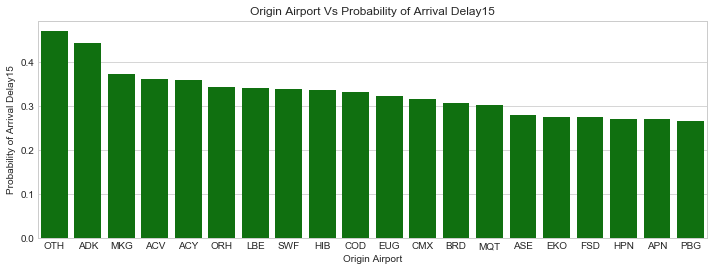

In [41]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of Arrival Delay15", data=airport_grouped[:20], color ='green')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Origin Airport Vs Probability of Arrival Delay15")

In [25]:
#for destination airport
airport_grouped3 = flights.groupby('Dest')["ArrDel15"].sum()
airport_grouped4 = flights.groupby('Dest')["ArrDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of Arrival Delay15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

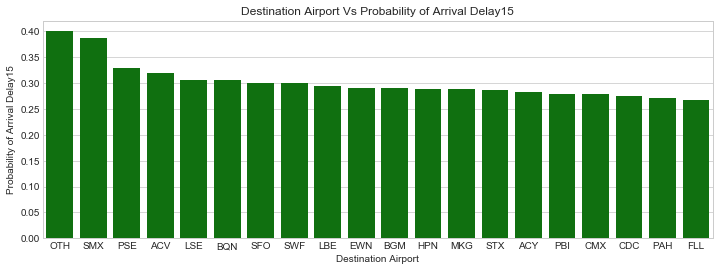

In [26]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of Arrival Delay15', data=airport_grouped_dest[:20], color ='green')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Destination Airport Vs Probability of Arrival Delay15")

In [27]:
#creating new attribute like 'source' to 'dest'
flights["Flight_route"] = flights["Origin"] + " to " + flights["Dest"]
flightroute = flights.groupby('Flight_route').sum()
flightroute.sort_values(by = "ArrDel15", axis = 0, ascending = False, inplace = True)

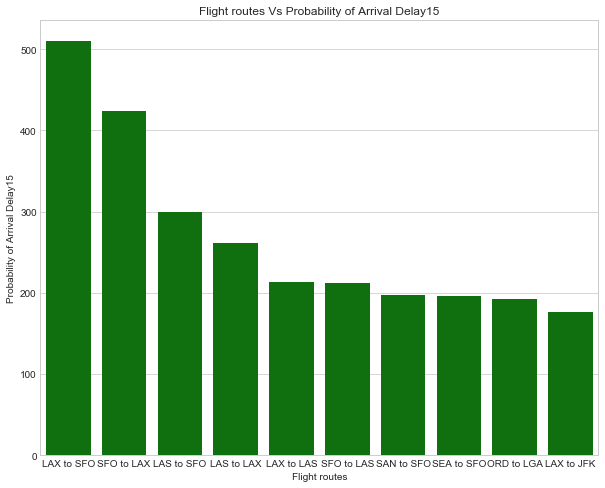

In [28]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

In [29]:
#new attribut for visualization
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
flights['Arrival_Time'] = flights["CRSArrTime"].apply(impute_time)
flights.drop("CRSArrTime", axis = 1, inplace = True)

In [30]:
#CRS time is like some computed time ,as we already have arrtime and deptime ,i think we dont need CRS time
flights['Departure_Time'] = flights["CRSDepTime"].apply(impute_time)
flights.drop("CRSDepTime", axis = 1, inplace = True)

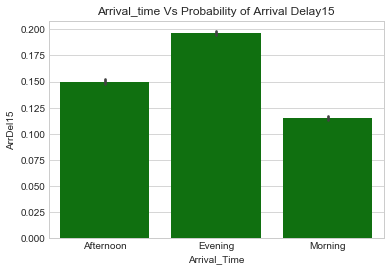

In [31]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Arrival_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

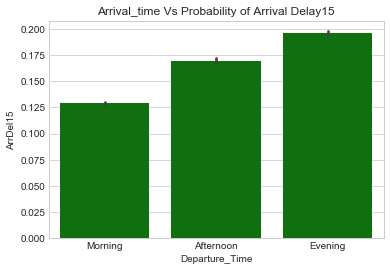

In [32]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Departure_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

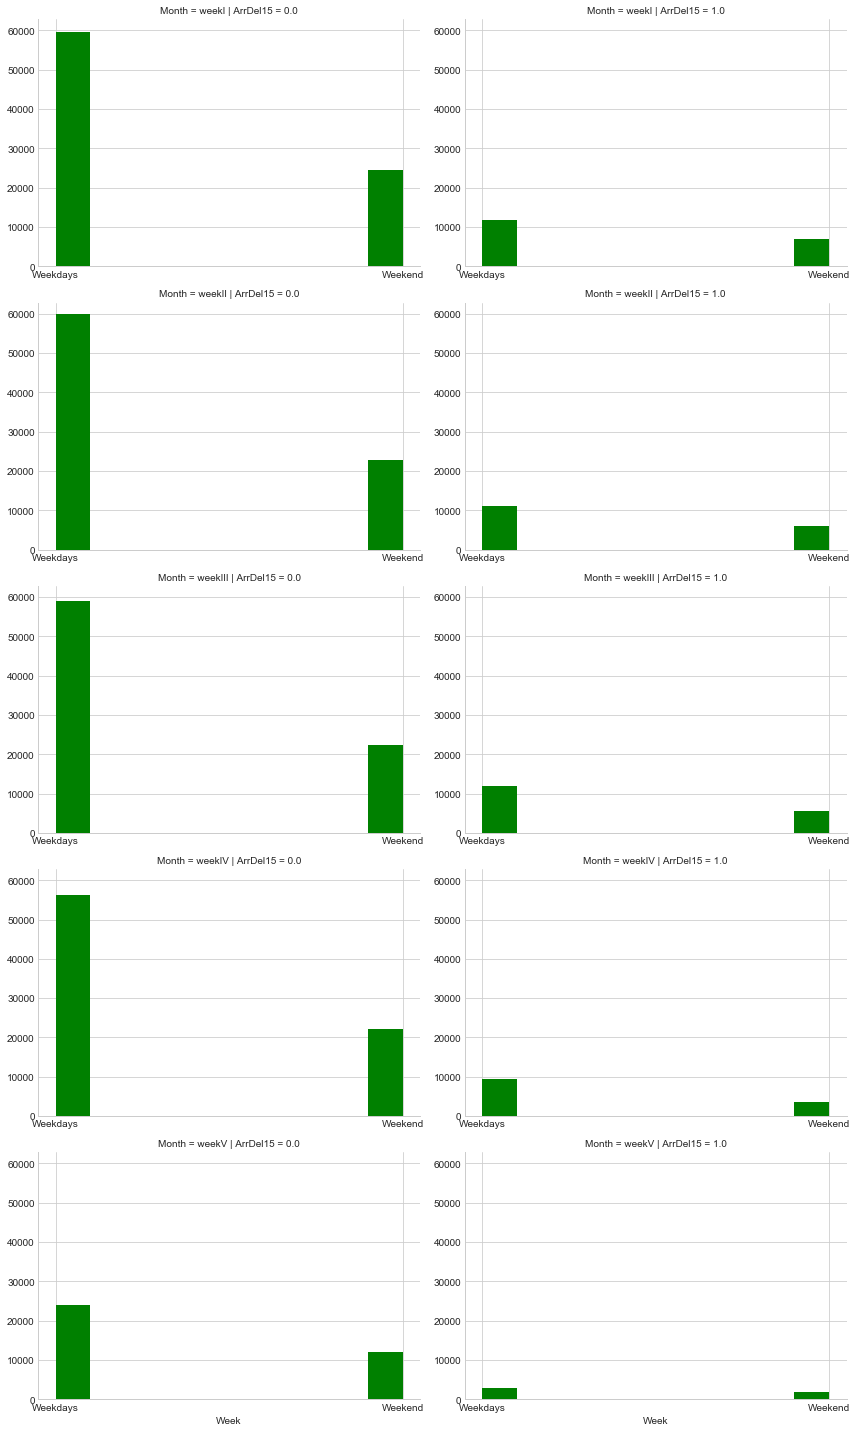

In [59]:
g=sns.FacetGrid(flights,col='ArrDel15',row='Month',size=4,aspect=1.5)
fig=g.map(plt.hist,'Week',color='g')

In [33]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [63]:
#i think these attributs
df_clean_for_delay = flights.drop(['AirlineID', 'TailNum',
        'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDelay',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Departure_Time'], axis = 1)

In [78]:
print(df_clean_for_delay.shape)
df_clean_for_delay.columns

(433298, 21)


Index(['FlightDate', 'UniqueCarrier', 'Carrier', 'FlightNum',
       'OriginAirportID', 'Origin', 'DestAirportID', 'DepTime',
       'DepDelayMinutes', 'DepDel15', 'TaxiOut', 'TaxiIn', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'AirTime', 'Distance', 'Month', 'Week',
       'Flight_route', 'Arrival_Time'],
      dtype='object')

                 FlightNum  OriginAirportID  DestAirportID   DepTime  \
FlightNum         1.000000        -0.012578      -0.016992 -0.005385   
OriginAirportID  -0.012578         1.000000       0.018819 -0.033577   
DestAirportID    -0.016992         0.018819       1.000000  0.037943   
DepTime          -0.005385        -0.033577       0.037943  1.000000   
DepDelayMinutes   0.018328         0.014297       0.016155  0.125293   
DepDel15          0.000439         0.014793       0.027358  0.181256   
TaxiOut           0.118542        -0.033445       0.008375 -0.044499   
TaxiIn           -0.035441         0.042621      -0.063834 -0.040220   
ArrTime          -0.011565        -0.002146       0.025153  0.663806   
ArrDelayMinutes   0.030255         0.017996       0.017395  0.105487   
ArrDel15          0.020186         0.026188       0.029608  0.137556   
AirTime          -0.308296         0.056410       0.100315 -0.033285   
Distance         -0.316598         0.079787       0.080284 -0.02

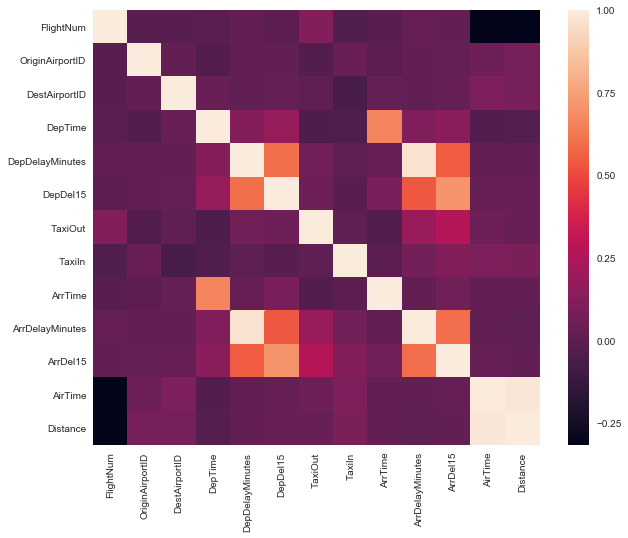

In [79]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [80]:
df_clean_for_delay.drop(["AirTime"], axis = 1, inplace = True)
df_clean_for_delay.drop(["DepDelayMinutes"], axis = 1, inplace = True)
